In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import pugna.activations
import pugna.layers

In [29]:
def plot_history(history, labels):
    plt.figure()
    for i, h in enumerate(history):
        loss = h.history["loss"]
        plt.plot(range(len(loss)), loss, label=labels[i])
    plt.yscale("log")
    plt.title('train')    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    if "val_loss"  in history[0].history.keys():
        plt.figure()
        for h in history:
            loss = h.history["val_loss"]
            plt.plot(range(len(loss)), loss, ls='--')
        plt.yscale("log")
        plt.title('validation')

In [119]:
def plot_prediction_and_error(x, y, model, xlim=None):
    yhat = model.predict(x)
    yRes = y - yhat
    
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    axes[0].plot(x, y)
    axes[0].plot(x, yhat)
    axes[1].plot(x, yRes)
    
    if xlim:
        for ax in axes:
            ax.set_xlim(*xlim)
    
    plt.show()
    plt.close()

In [102]:
 def gen_test_data(npts=100):
#     x = np.linspace(-np.pi/2., np.pi/2., 100)
    x = np.linspace(-1, 1, npts)[:,np.newaxis]
    y = np.cos(20*x) + np.sin(10*x)
#     y = np.cos(50*x) + np.sin(5*x)

    noise = np.random.normal(0, 0.1, size=x.shape)

    return x, y + noise

x, y = gen_test_data(npts=1000)

In [103]:
x.shape

(1000, 1)

In [104]:
y.shape

(1000, 1)

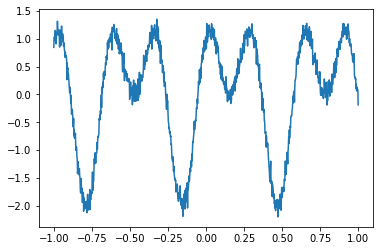

In [105]:
plt.figure()
plt.plot(x, y)
plt.show()
plt.close()

In [106]:
def get_base_model(x, y, units=200, verbose=True, epochs=5000):
    batch_size=x.shape[0]
    
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(1,)),
        tf.keras.layers.Dense(units, activation='tanh'),
        tf.keras.layers.Dense(units, activation='tanh'),
        tf.keras.layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(0.001, amsgrad=True)
    model.compile(loss='mse', optimizer=optimizer)
    
    history = model.fit(x, y, batch_size=batch_size, epochs=epochs, verbose=verbose)
    
    return history, model

In [123]:
def get_mscale_model(x, y, units=200, nscales=50, verbose=True, epochs=5000):
    batch_size=x.shape[0]

    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(1,)),
        pugna.layers.Mscale(units, nscales),
        tf.keras.layers.Activation(pugna.activations.s2relu),
        pugna.layers.Mscale(units, nscales),
        tf.keras.layers.Activation(pugna.activations.s2relu),
        pugna.layers.Mscale(units, nscales),
        tf.keras.layers.Activation(pugna.activations.s2relu),
        tf.keras.layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(0.001, amsgrad=True)
    model.compile(loss='mse', optimizer=optimizer)
    
    history = model.fit(x, y, batch_size=batch_size, epochs=epochs, verbose=verbose)
    
    return history, model

In [108]:
def get_mscale_model_2(x, y, units=200, nscales=50, verbose=True, epochs=5000):
    batch_size=x.shape[0]

    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(1,)),
        pugna.layers.Mscale(units, nscales),
        tf.keras.layers.Activation(pugna.activations.s2relu),
        tf.keras.layers.Dense(units),
        tf.keras.layers.Activation(pugna.activations.s2relu),
        pugna.layers.Mscale(units, nscales),
        tf.keras.layers.Dense(units),
        tf.keras.layers.Activation(pugna.activations.s2relu),
        tf.keras.layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(0.001, amsgrad=True)
    model.compile(loss='mse', optimizer=optimizer)
    
    history = model.fit(x, y, batch_size=batch_size, epochs=epochs, verbose=verbose)
    
    return history, model

In [109]:
%%time
history1, model1 = get_base_model(x, y, verbose=False)

CPU times: user 40 s, sys: 2.68 s, total: 42.7 s
Wall time: 10.3 s


In [110]:
%%time
history2, model2 = get_mscale_model_2(x, y, verbose=False)

CPU times: user 2min 34s, sys: 1min 13s, total: 3min 48s
Wall time: 41.4 s


In [124]:
%%time
history3, model3 = get_mscale_model(x, y, verbose=False)

CPU times: user 1min 59s, sys: 1min, total: 3min
Wall time: 34.8 s


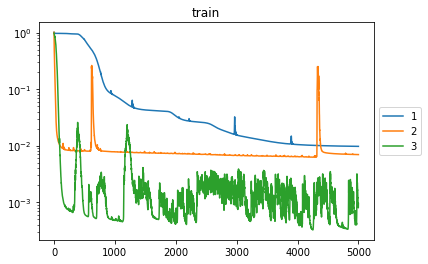

In [125]:
plot_history([history1,history2,history3], labels=['1','2','3'])

In [126]:
yhat1 = model1.predict(x)

In [127]:
yhat2 = model2.predict(x)

In [128]:
yhat3 = model3.predict(x)

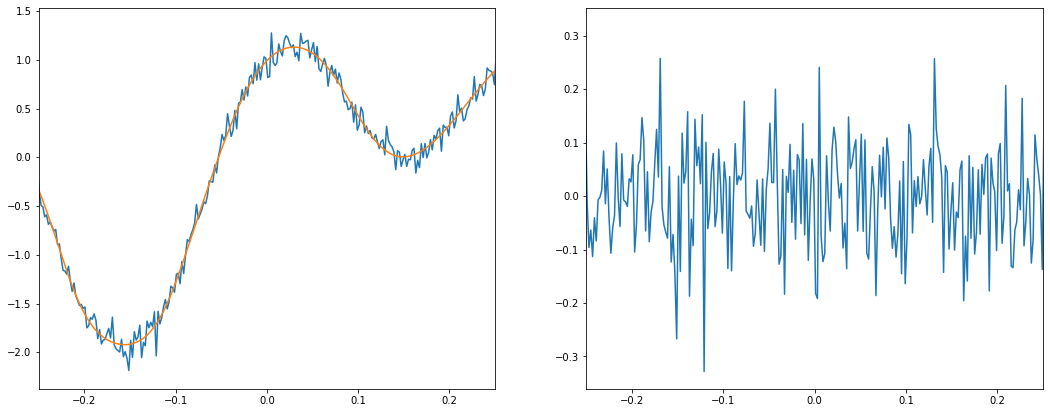

In [129]:
plot_prediction_and_error(x, y, model1, xlim=(-0.25, 0.25)) 

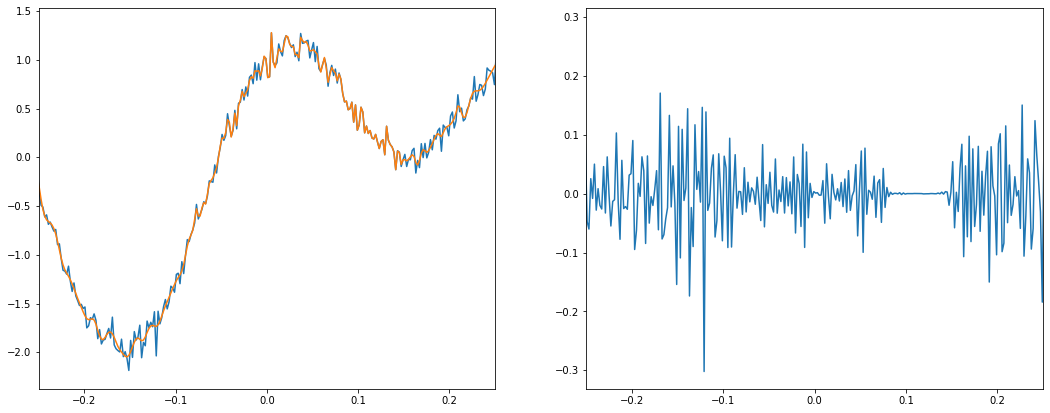

In [130]:
plot_prediction_and_error(x, y, model2, xlim=(-0.25, 0.25)) 

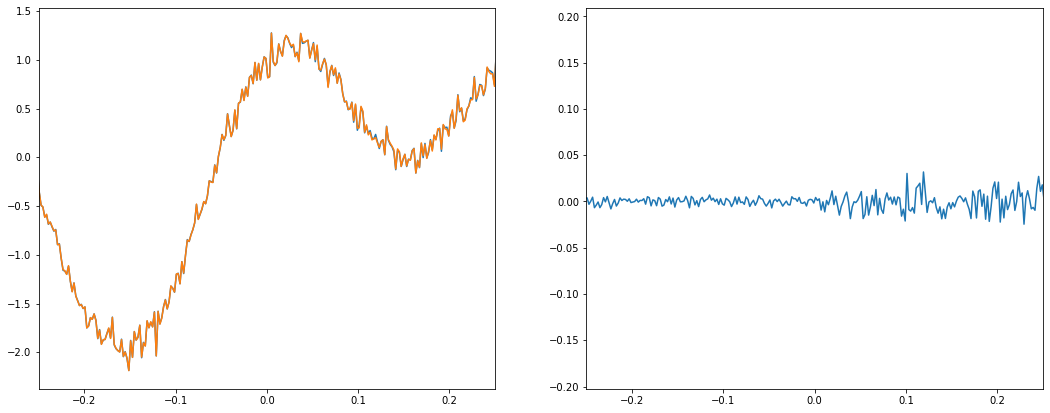

In [131]:
plot_prediction_and_error(x, y, model3, xlim=(-0.25, 0.25))

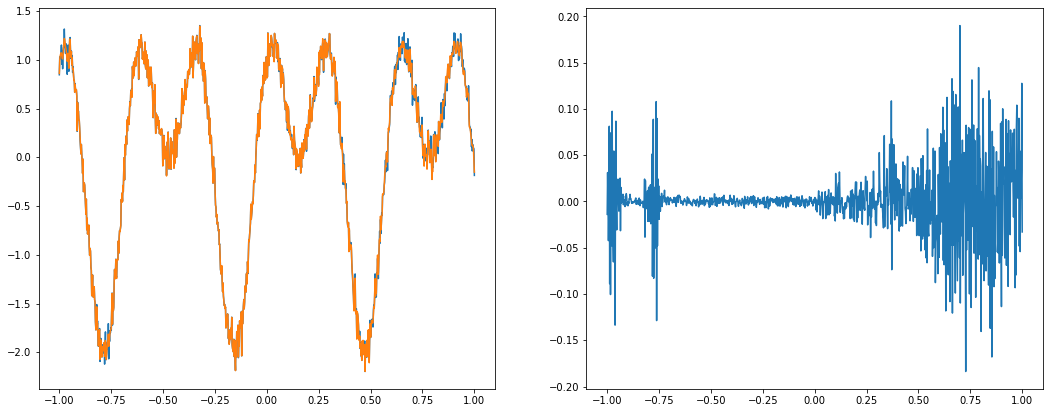

In [132]:
plot_prediction_and_error(x, y, model3)